## Carga de librerías 

In [73]:
# Carga de librerías 

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import seaborn as sns
import scipy.stats as stats

## Carga de datos

In [24]:


# URL 
customers_url = "https://raw.githubusercontent.com/Alop89/c21-51-m-data-bi/main/data/customers.csv"
orders_url = "https://raw.githubusercontent.com/Alop89/c21-51-m-data-bi/refs/heads/main/data/orders.csv"
products_url = "https://raw.githubusercontent.com/Alop89/c21-51-m-data-bi/refs/heads/main/data/products.csv"
sales_url = "https://raw.githubusercontent.com/Alop89/c21-51-m-data-bi/refs/heads/main/data/sales.csv"

# Carga del dataset
customers = pd.read_csv(customers_url)
orders = pd.read_csv(orders_url)
products = pd.read_csv(products_url)
sales = pd.read_csv(sales_url)


### Verificación de datos

In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [26]:
customers.sample(10)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
667,668,Dominic Caswall,Male,61,746 Greenfelder GroveSuite 199,3948,West Matilda,Victoria,Australia
507,508,Jan Isenor,Non-binary,65,6863 Tremblay KnollSuite 290,9728,West Annaport,Northern Territory,Australia
6,7,Winslow Ewbanck,Bigender,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland,Australia
867,868,Berry Rosiello,Agender,28,682 Alyssa CrestApt. 916,8448,New Charlieville,Western Australia,Australia
486,487,Nehemiah Yurenin,Male,21,7199 Caleb StreetSuite 174,4113,South Amelie,Victoria,Australia
291,292,Aldin Moline,Male,25,7210 Farrell HillApt. 735,6426,West Aidenview,Victoria,Australia
767,768,Aida Warsap,Bigender,52,11 Joel CircuitSuite 126,1876,Port Isabel,Northern Territory,Australia
706,707,Fremont Tewnion,Polygender,69,66 Lillian CircuitSuite 433,7394,Krisview,Australian Capital Territory,Australia
637,638,Olympia Stobbs,Female,23,91 William IslandSuite 740,2973,Reillyborough,Victoria,Australia
357,358,Jermaine Goranov,Genderfluid,64,9937 Oliver CircleApt. 655,6842,Kreigerbury,Northern Territory,Australia


In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [28]:
# Cambio de formato de columasn 'order_date' y 'delivery_date' a fecha

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['delivery_date'] = pd.to_datetime(orders['delivery_date'])

In [29]:
orders.sample(10)

,order_id,customer_id,payment,order_date,delivery_date
230,231,731,58824,2021-03-20,2021-04-09
636,637,886,14294,2021-08-06,2021-08-18
765,766,929,13750,2021-08-06,2021-08-15
178,179,161,52081,2021-06-10,2021-06-27
651,652,691,30816,2021-03-09,2021-03-27
227,228,773,10857,2021-01-06,2021-01-17
475,476,757,42157,2021-10-07,2021-11-02
721,722,401,20524,2021-10-24,2021-11-20
902,903,789,21721,2021-01-05,2021-01-21
0,1,64,30811,2021-08-30,2021-09-24


In [30]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_ID    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB


In [31]:
products.sample(10)

,product_ID,product_type,product_name,size,colour,price,quantity,description
555,555,Jacket,Leather,XS,violet,113,70,"A violet coloured, XS sized, Leather Jacket"
576,576,Jacket,Bomber,S,green,90,54,"A green coloured, S sized, Bomber Jacket"
339,339,Shirt,Mandarin Collar,XL,blue,108,71,"A blue coloured, XL sized, Mandarin Collar Shirt"
897,897,Trousers,Cords,M,blue,113,47,"A blue coloured, M sized, Cords Trousers"
127,127,Shirt,Denim,M,blue,115,58,"A blue coloured, M sized, Denim Shirt"
67,67,Shirt,Dress,M,violet,119,41,"A violet coloured, M sized, Dress Shirt"
1105,1105,Trousers,Cropped,XS,blue,99,47,"A blue coloured, XS sized, Cropped Trousers"
257,257,Shirt,Polo,M,yellow,117,52,"A yellow coloured, M sized, Polo Shirt"
91,91,Shirt,Flannel,S,blue,96,43,"A blue coloured, S sized, Flannel Shirt"
1065,1065,Trousers,Joggers,XS,green,94,77,"A green coloured, XS sized, Joggers Trousers"


In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [33]:
sales.sample(10)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
4517,4517,900,679,113,3,339
1749,1749,354,976,97,1,97
2026,2026,408,399,119,2,238
2597,2597,521,405,119,1,119
4266,4266,849,993,106,3,318
3074,3074,617,847,113,1,113
2926,2926,584,832,117,2,234
1898,1898,380,616,112,2,224
4117,4117,818,1240,112,1,112
317,317,73,1135,102,1,102


# Conclusiones de la sección

Se tienen 1,000 registros. No se encontraron elementos duplicados o elementos faltanes. Se cambiaron los formatos de la fecha de las columnas orden y entrega

## Análisis exploratorio de datos

C:\Users\ibtjl\AppData\Local\Temp\ipykernel_14208\2608608756.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(customer_age, ax=axs[0], kde=True, palette='viridis')
C:\Users\ibtjl\AppData\Local\Temp\ipykernel_14208\2608608756.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(customer_gender, ax=axs[1], kde = True, palette='viridis')


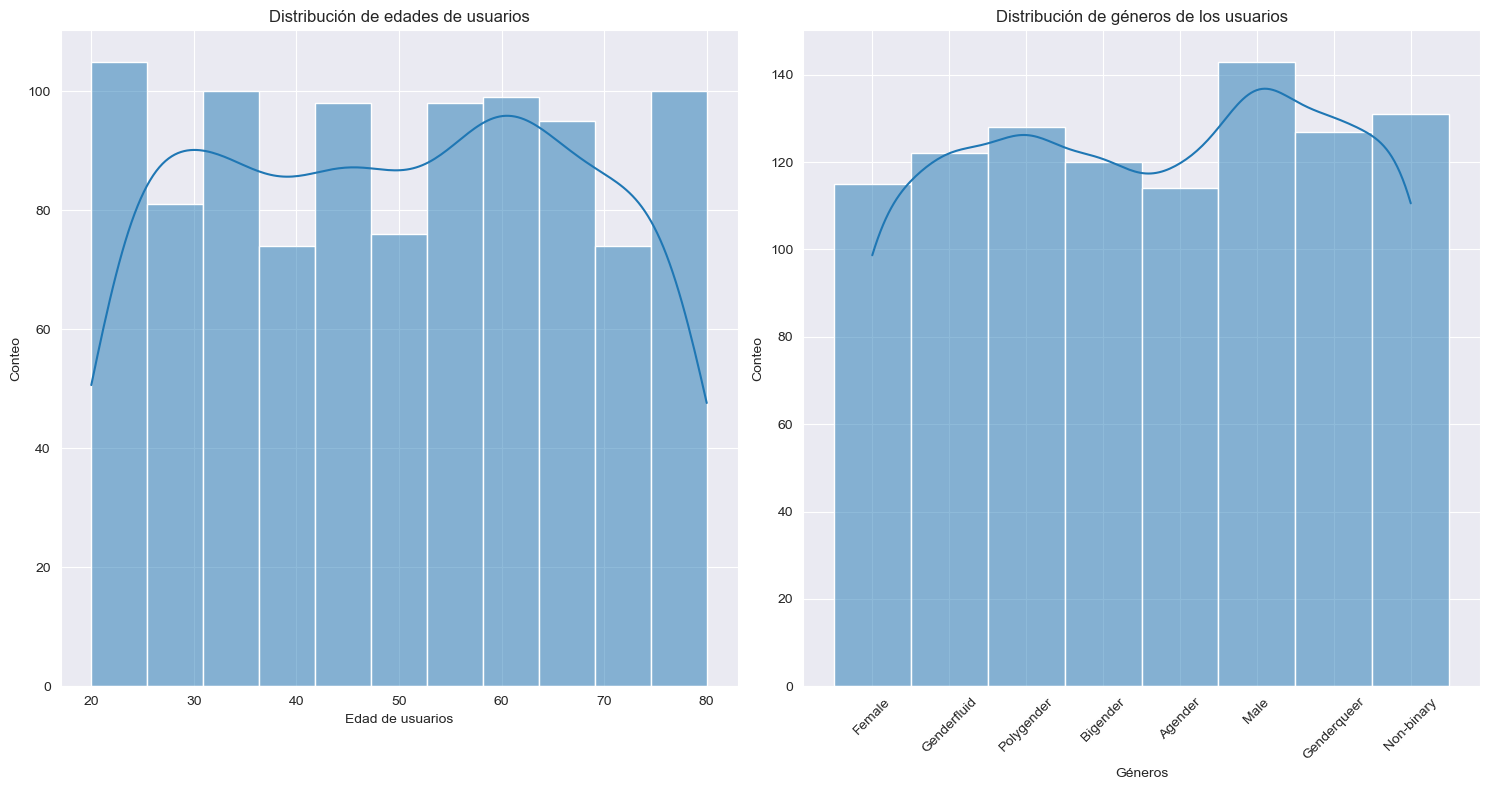

In [34]:
# Distribución de edades de los usuarios 
# Crear los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Subplot 1
customer_age = customers['age']
sns.histplot(customer_age, ax=axs[0], kde=True, palette='viridis') 
axs[0].set_title('Distribución de edades de usuarios')
axs[0].set_ylabel('Conteo')
axs[0].set_xlabel('Edad de usuarios')

# Subplot 2
customer_gender = customers['gender']
sns.histplot(customer_gender, ax=axs[1], kde = True, palette='viridis')
axs[1].set_title('Distribución de géneros de los usuarios')
axs[1].set_ylabel('Conteo')
axs[1].set_xlabel('Géneros')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [35]:
customers['age'].describe()

count    1000.000000
mean       49.860000
std        17.647828
min        20.000000
25%        34.000000
50%        50.000000
75%        65.000000
max        80.000000
Name: age, dtype: float64

In [36]:
customers['gender'].mode()

0    Male
Name: gender, dtype: object

C:\Users\ibtjl\AppData\Local\Temp\ipykernel_14208\869828797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(customer_age, palette= 'viridis')


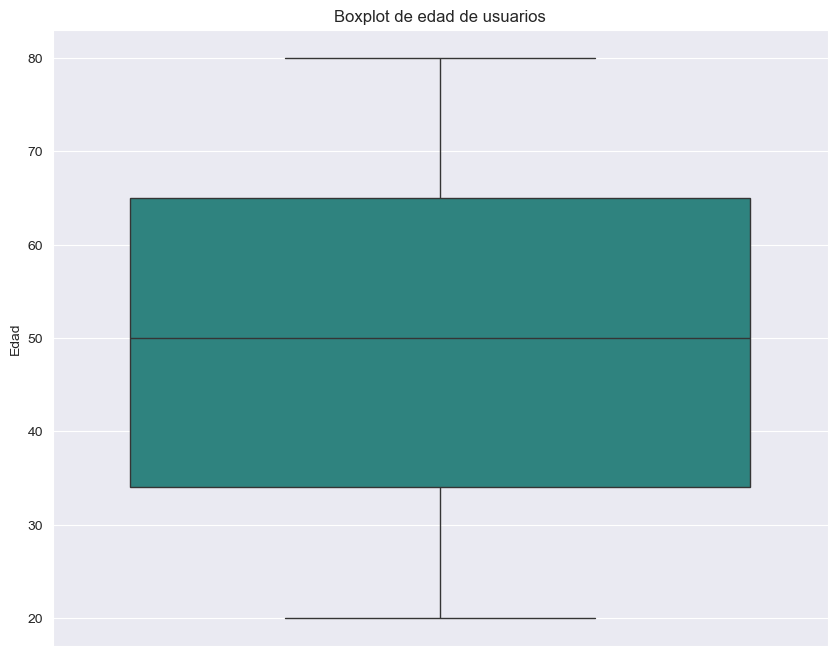

In [37]:
# Diagrama de cajas y bigotes sobre la edad de los usuarios
plt.figure(figsize=(10,8))
sns.boxplot(customer_age, palette= 'viridis')
plt.title('Boxplot de edad de usuarios')
plt.ylabel('Edad')
plt.show()

## Observaciones

Se obtuvo la distribución de las edades y los géneros encontrando que la edad media es de 50 años y el género que más registrado es 'male'

C:\Users\ibtjl\AppData\Local\Temp\ipykernel_14208\508722113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(customers['state'].value_counts().head(15).sort_values(ascending = False), palette='viridis')


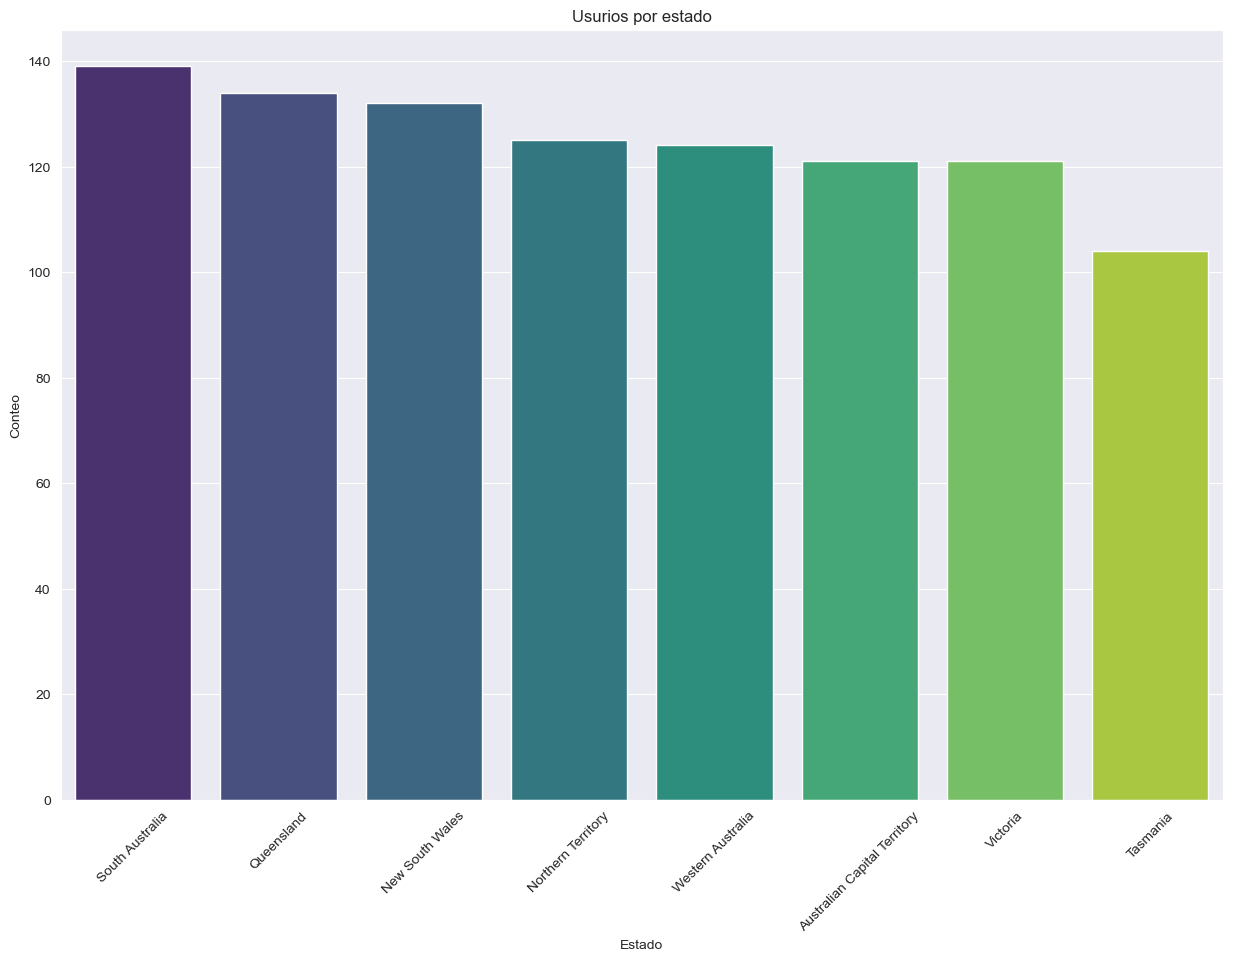

In [38]:
# Distribución de usuarios por ciudad y por estado 

# Subplot 2
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(customers['state'].value_counts().head(15).sort_values(ascending = False), palette='viridis')
plt.title('Usurios por estado')
plt.ylabel('Conteo')
plt.xlabel('Estado')
plt.xticks(rotation = 45)

plt.show()

## Observaciones

El estado con más usuarios es 'South Australia' y el estado con menos usuarios es 'Tasmania'.

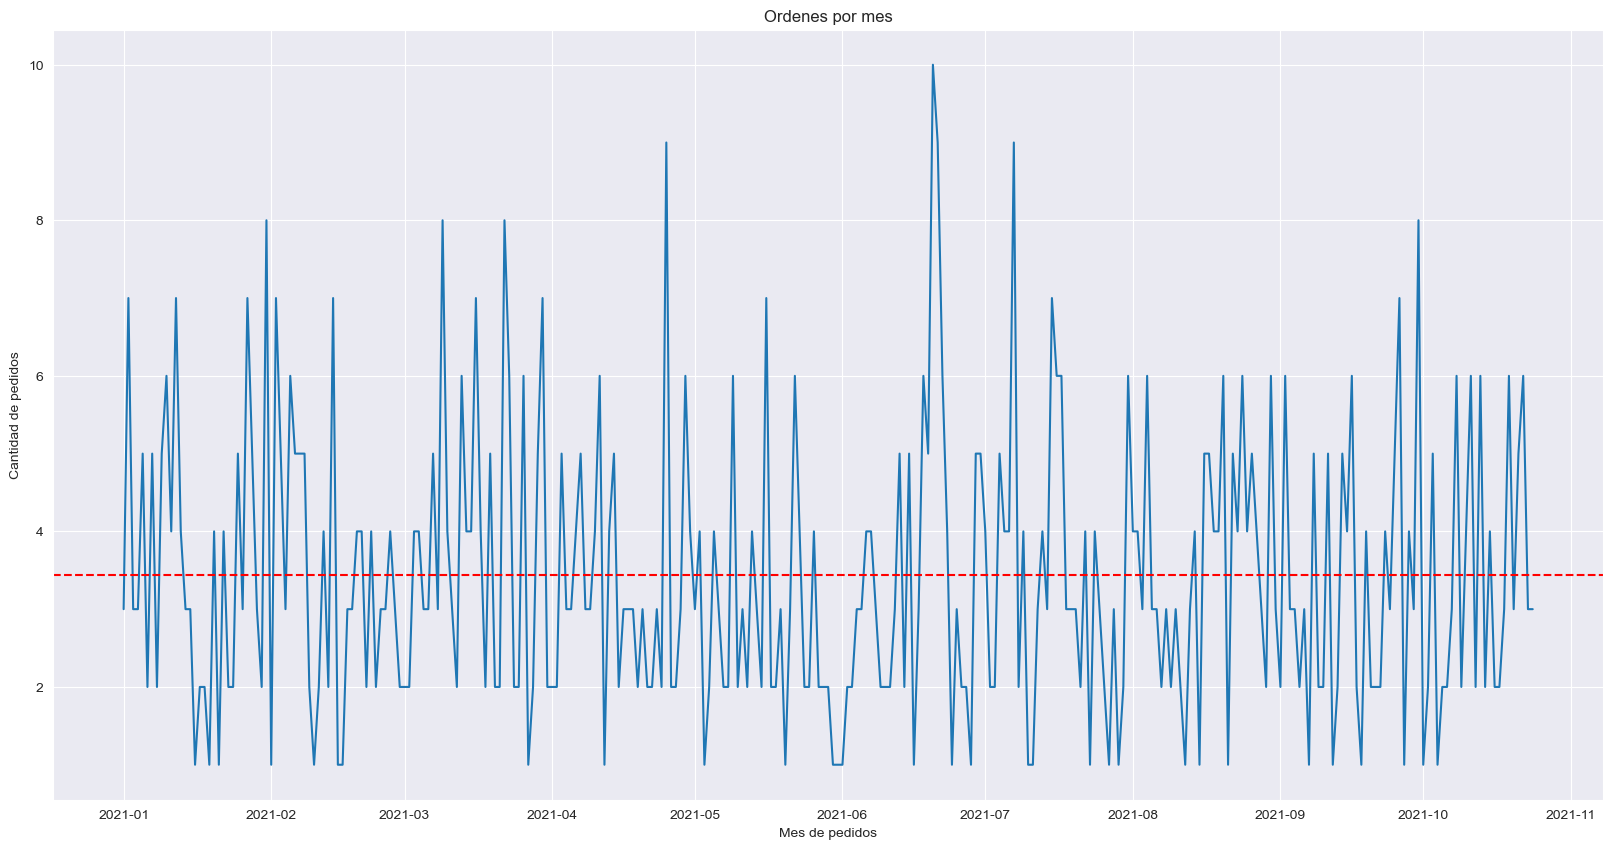

In [39]:
# Ordenes por día 

order_per_day = orders.groupby('order_date').size()

orders_mean = order_per_day.mean()

plt.figure(figsize=(20,10))
sns.lineplot(order_per_day)
plt.title('Ordenes por mes')
plt.axhline(y = orders_mean, color ='red', linestyle ='--' )
plt.ylabel('Cantidad de pedidos')
plt.xlabel('Mes de pedidos')
plt.show()

In [40]:
order_per_day = order_per_day.reset_index(name ='n_count')
order_per_day

,order_date,n_count
0,2021-01-01,3
1,2021-01-02,7
2,2021-01-03,3
3,2021-01-04,3
4,2021-01-05,5
...,...,...
286,2021-10-20,3
287,2021-10-21,5
288,2021-10-22,6
289,2021-10-23,3


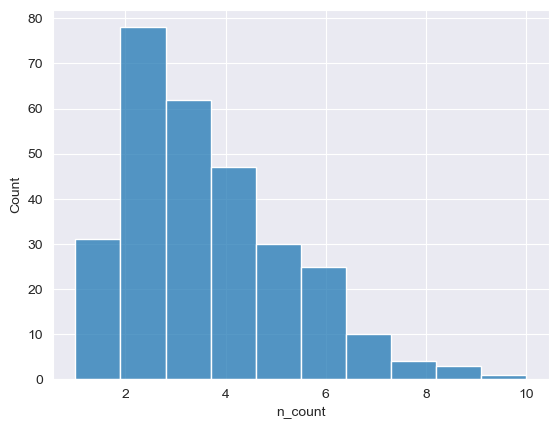

In [41]:
sns.histplot(order_per_day['n_count'], bins = 10)
plt.show()

In [42]:
order_per_day['n_count'].describe()

count    291.000000
mean       3.436426
std        1.815236
min        1.000000
25%        2.000000
50%        3.000000
75%        4.500000
max       10.000000
Name: n_count, dtype: float64

In [43]:
order_per_day.mean()

order_date    2021-05-29 00:49:29.072164864
n_count                            3.436426
dtype: object

In [46]:
order_per_day['month'] = order_per_day['order_date'].dt.month
order_per_day_month = order_per_day.groupby('month').agg({'n_count':'sum'})
order_per_day_month = order_per_day_month.reset_index()
order_per_day_month.sort_values(by='n_count', ascending= False)

,month,n_count
2,3,118
0,1,109
7,8,107
6,7,105
5,6,103
3,4,101
8,9,98
1,2,94
4,5,84
9,10,81


C:\Users\ibtjl\AppData\Local\Temp\ipykernel_14208\2502699089.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(orders_per_month, x='month', y='orders', palette='viridis')


Text(0, 0.5, 'Cantidad de ordenes')

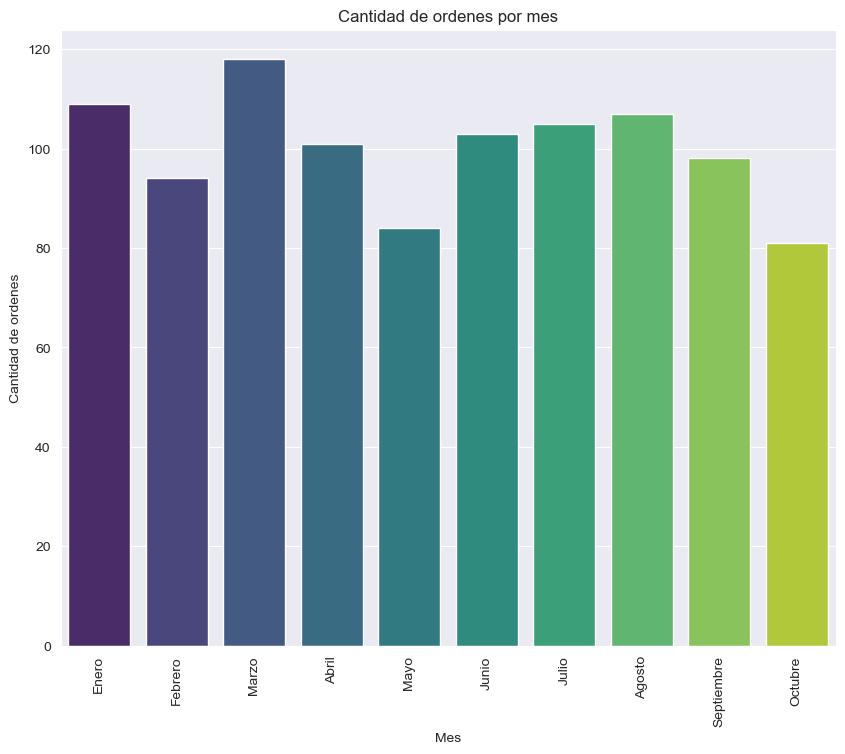

In [47]:
orders['month'] = orders['order_date'].dt.month


orders_per_month = orders.groupby('month').size().reset_index()
orders_per_month.columns = ['month','orders']
plt.figure(figsize=(10,8))
sns.barplot(orders_per_month, x='month', y='orders', palette='viridis')
plt.title('Cantidad de ordenes por mes')
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre']
plt.xticks(ticks=range(len(meses)), labels=meses, rotation=90)
plt.xlabel('Mes')
plt.ylabel('Cantidad de ordenes')


## Obseravciones 

Se tienen en promedio 3.4 pedidos por día, teniendo como día con mayor número de ordenes el 20-06-2021. El mes con mayores órdenes fue el 3 y el de menos ordenes el mes 10. 

<Figure size 1000x1000 with 0 Axes>

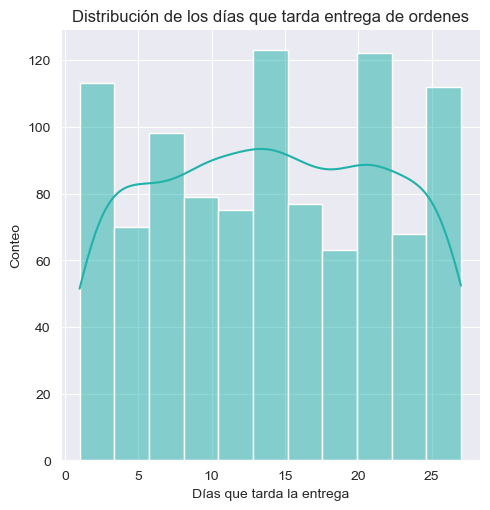

In [48]:
# Distribución de los tiempos de envío 

orders['devlivery_day'] = (orders['delivery_date'] - orders['order_date']).dt.days



plt.figure(figsize=(10,10))
sns.displot(orders['devlivery_day'], kde = True, color = 'lightseagreen')
plt.title('Distribución de los días que tarda entrega de ordenes')
plt.xlabel('Días que tarda la entrega')
plt.ylabel('Conteo')
plt.show()

In [49]:
orders['devlivery_day'].describe()

count    1000.000000
mean       14.078000
std         7.707225
min         1.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        27.000000
Name: devlivery_day, dtype: float64

C:\Users\ibtjl\AppData\Local\Temp\ipykernel_14208\4219852471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(days_delivery, palette='viridis')


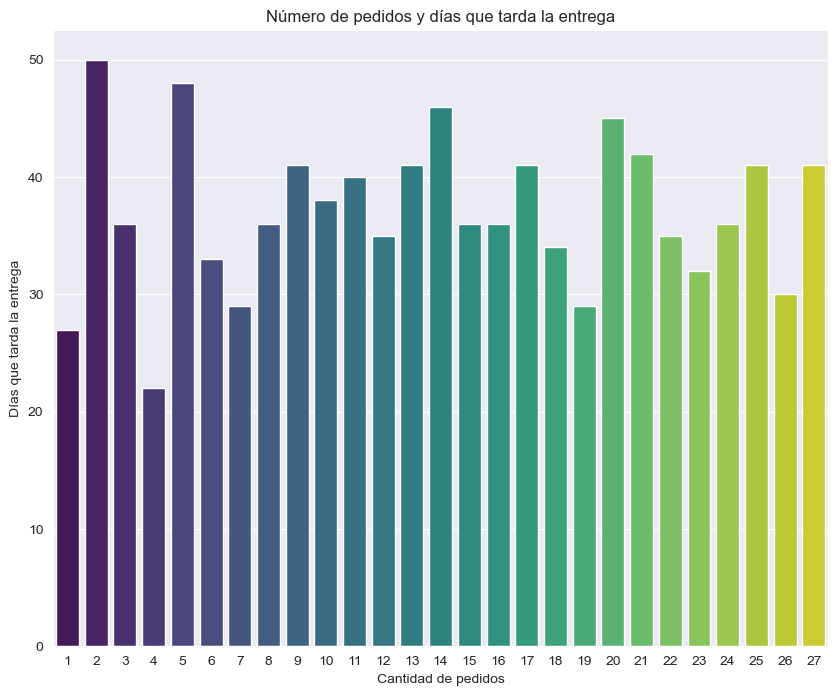

In [50]:
# Tiempo que tardan en enviar los pedidos

days_delivery = orders.groupby('devlivery_day').size()
plt.figure(figsize=(10,8))
sns.barplot(days_delivery, palette='viridis')
plt.title('Número de pedidos y días que tarda la entrega')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Días que tarda la entrega')
plt.show()

## Observaciones

No se observa una relación entre la cantidad de pedidos y los días que tardan en ser recibidos. 

In [ ]:
days_delivery = days_delivery.reset_index(name='delivery')

,devlivery_day,delivery
0,1,27
1,2,50
2,3,36
3,4,22
4,5,48
5,6,33
6,7,29
7,8,36
8,9,41
9,10,38


In [54]:
days_delivery['percentage'] = (days_delivery['delivery'] / days_delivery['delivery'].sum())*100
days_delivery['cum_sum'] = days_delivery['percentage'].cumsum()
less_than_10 = days_delivery[days_delivery['devlivery_day'] < 10]['percentage'].sum()
between_10_and_20 = days_delivery[(days_delivery['devlivery_day'] >= 10) & (days_delivery['devlivery_day'] <= 20)]['percentage'].sum()
more_than_20 = days_delivery[(days_delivery['devlivery_day'] > 20)]['percentage'].sum()

print(less_than_10)
print(between_10_and_20)
print(more_than_20)

32.2
42.1
25.700000000000003


In [53]:
customers_orders = customers.merge(orders, on ='customer_id', how ='right')
customers_orders

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,payment,order_date,delivery_date,month,devlivery_day
0,64,Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,1,30811,2021-08-30,2021-09-24,8,25
1,473,Lori Briars,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,2,50490,2021-02-03,2021-02-13,2,10
2,774,Ellynn Korba,Genderqueer,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,3,46763,2021-10-08,2021-11-03,10,26
3,433,Candis Roswarne,Non-binary,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,4,39782,2021-05-06,2021-05-19,5,13
4,441,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,5,14719,2021-03-23,2021-03-24,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,345,Merrielle Piken,Genderqueer,62,9182 Hermann MallApt. 890,799,Audreyfurt,Victoria,Australia,996,37843,2021-01-13,2021-02-02,1,20
996,346,Kerianne Parris,Genderqueer,40,59 Bergstrom GroveSuite 260,6060,Olsonbury,Northern Territory,Australia,997,53831,2021-01-18,2021-01-31,1,13
997,407,Murdock Bulfit,Male,41,5233 Lara AvenueSuite 291,8697,Hartmannshire,Queensland,Australia,998,53308,2021-05-05,2021-05-21,5,16
998,428,Jammal Varcoe,Polygender,66,80 Hermiston WaySuite 403,1112,North Liamfort,Australian Capital Territory,Australia,999,31643,2021-06-15,2021-07-12,6,27


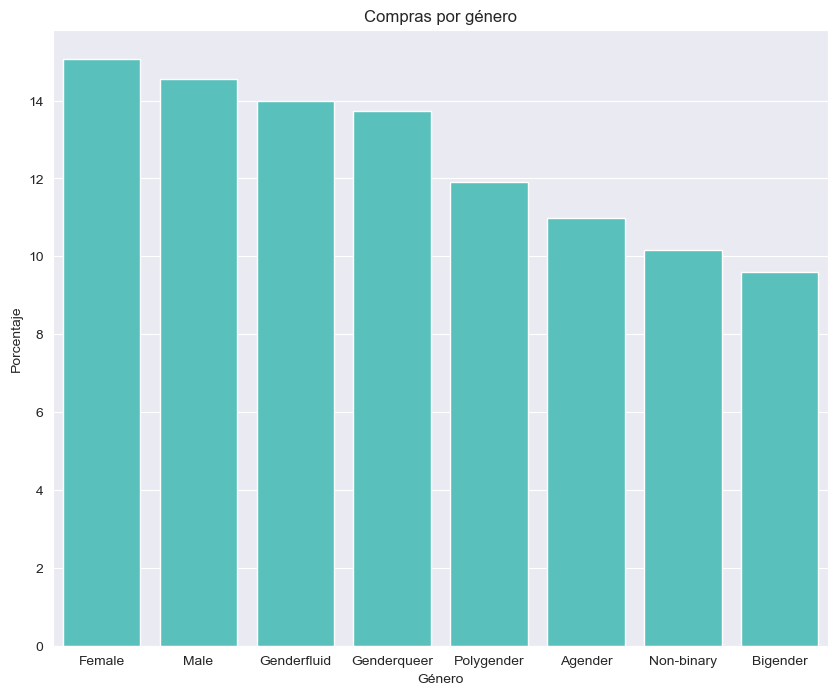

In [55]:
# Qué géneros realizan más

gender_group = customers_orders.groupby('gender').agg({'order_id':'sum'})
gender_group.sort_values(by ='order_id', ascending= False, inplace= True)
gender_group.reset_index(inplace = True)


# Cálculo del porcentaje de compras 
gender_group['percentage'] = (gender_group['order_id'] / gender_group['order_id'].sum())*100


# Gráfico de barras 

plt.figure(figsize = (10,8))
sns.barplot(data =gender_group, x ='gender', y ='percentage', color = 'mediumturquoise')
plt.title('Compras por género')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.show()

In [56]:
gender_group.sort_values(by='percentage', ascending = False)

,gender,order_id,percentage
0,Female,75400,15.064935
1,Male,72776,14.540659
2,Genderfluid,70020,13.990010
3,Genderqueer,68781,13.742458
4,Polygender,59591,11.906294
5,Agender,55030,10.995005
6,Non-binary,50854,10.160639
7,Bigender,48048,9.600000


## Observaciones

Las mujeres realizan el 15% de las compras, mientras que las personas identificadas como 'Bigender' representan el 9.6%. 

In [58]:
# Compras por estado 

purchase_per_state = customers_orders.groupby('state').agg({'order_id':'count'}).reset_index().sort_values(by='order_id', ascending=False)
purchase_per_state

,state,order_id
4,South Australia,148
3,Queensland,139
7,Western Australia,130
1,New South Wales,129
0,Australian Capital Territory,118
6,Victoria,118
5,Tasmania,112
2,Northern Territory,106


In [63]:
orders_age = customers_orders.groupby('age').agg({'order_id':'count'}).reset_index().sort_values(by='order_id', ascending=False)
orders_age.columns = ['age','total_orders']
print(orders_age.head(5))
print()
print(orders_age.tail(5))

    age  total_orders
37   57            34
55   75            27
12   32            27
18   38            26
43   63            26

    age  total_orders
52   72             8
9    29             8
57   77             8
13   33             7
45   65             7


<Axes: xlabel='age', ylabel='total_orders'>

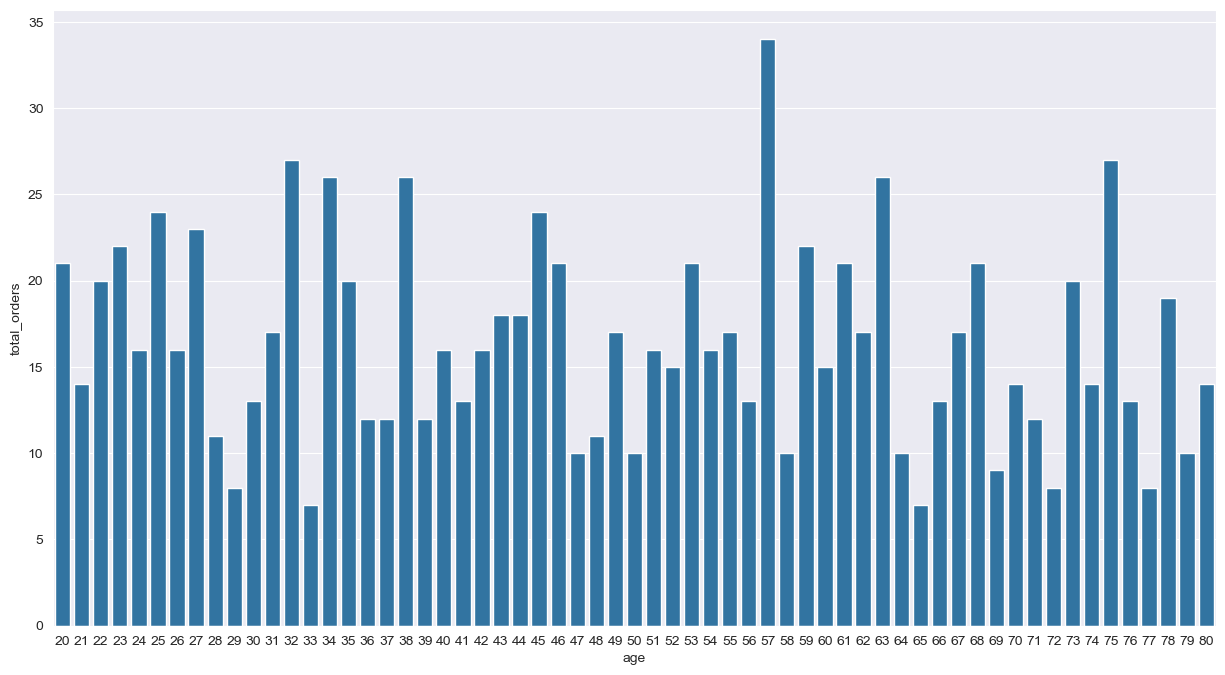

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(orders_age, x ='age', y='total_orders')

In [65]:
age_20_40 = orders_age[(orders_age['age'] >= 20) & (orders_age['age'] <=40)]['total_orders'].sum()
age_40_60 = orders_age[(orders_age['age'] > 40) & (orders_age['age'] <=60)]['total_orders'].sum()
age_80_60 = orders_age[(orders_age['age'] > 60) & (orders_age['age'] <=80)]['total_orders'].sum()


In [66]:
ages_orders = {
    'ages':['20_40', '41_60', '61_80'], 
    'total_orders':[age_20_40, age_40_60, age_80_60 ]
}

age_total_orders = pd.DataFrame(ages_orders)
age_total_orders

,ages,total_orders
0,20_40,363
1,41_60,337
2,61_80,300


Text(0, 0.5, 'Compras totales')

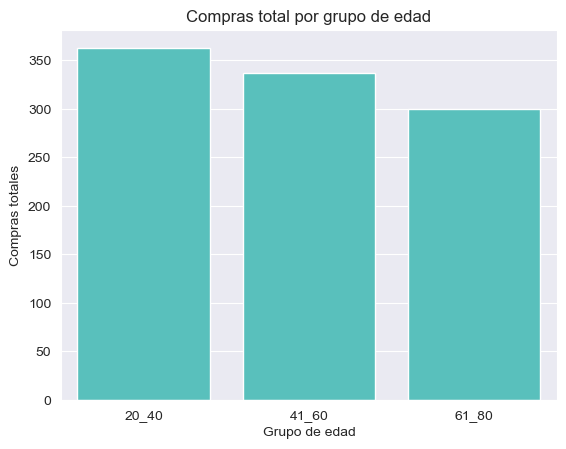

In [67]:
sns.barplot(data = age_total_orders, x='ages', y='total_orders', color = 'mediumturquoise')
plt.title('Compras total por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Compras totales')

## Observaciones 
El grupo de 61 a 80 años es el que menos órdenes realiza. 

# ¿Existe diferencia estadística entre los tiempo de entrega para los estados que más venden en comparación con los estados que menos venden?

### Hipótesis nula (H₀): Las medias de los dos grupos son iguales (no existe diferencia significativa).
### Hipótesis alternativa (H₁): Las medias de los dos grupos son diferentes (existe diferencia significativa).

##

In [68]:
# Obtención de tiempo media de entrega por estados con menos venta

delivery_state = customers_orders.groupby('state').agg({'devlivery_day':'mean'}).reset_index().sort_values(by='devlivery_day', ascending=False)
state_low_sales = ['Australian Capital Territory', 'Capital Territory', 'Victoria', 'Tasmania']
delivery_state[delivery_state['state'].isin(state_low_sales)]['devlivery_day'].mean()

14.087570621468927

In [69]:
# Obtención de tiempo media de entrega por estados restantes
delivery_state[~delivery_state['state'].isin(state_low_sales)]['devlivery_day'].mean()

14.047203007869905

In [75]:
grupo_1 = delivery_state[delivery_state['state'].isin(state_low_sales)]['devlivery_day']

In [76]:
grupo_2 = delivery_state[~delivery_state['state'].isin(state_low_sales)]['devlivery_day']

In [77]:
# Prueba de normalidad
normal_grupo_1 = stats.shapiro(grupo_1)
normal_grupo_2 = stats.shapiro(grupo_2)

# Determinar si los datos son normales
if normal_grupo_1.pvalue > 0.05 and normal_grupo_2.pvalue > 0.05:
    # Realizar prueba t de Student para muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_1, grupo_2, equal_var=False)
    print("Prueba t de Student (muestras independientes)")
else:
    # Realizar prueba de Mann-Whitney U (no paramétrica)
    t_stat, p_valor = stats.mannwhitneyu(grupo_1, grupo_2, alternative='two-sided')
    print("Prueba de Mann-Whitney U (no paramétrica)")

print(f'Estadístico de prueba: {t_stat}')
print(f'Valor p: {p_valor}')

# Interpretación
if p_valor < 0.05:
    print("Existe una diferencia estadísticamente significativa entre los grupos.")
else:
    print("No existe una diferencia estadísticamente significativa entre los grupos.")

Prueba t de Student (muestras independientes)
Estadístico de prueba: 0.11470802598920299
Valor p: 0.9127295266066233
No existe una diferencia estadísticamente significativa entre los grupos.


## Observaciones

No hay diferencia entre los tiempos de entrega que existen entre los estados con más ventas vs los estados de menos ventas. 

In [78]:
normal_grupo_1

ShapiroResult(statistic=0.9207357307819196, pvalue=0.454930501169842)

In [79]:
normal_grupo_2

ShapiroResult(statistic=0.8987396348833103, pvalue=0.40295873949074423)